In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

#from copy import copy
from matplotlib.colors import LogNorm
#from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator

from process_functions import *

from matplotlib import style
style.use('/global/home/users/ftoralesacosta/dotfiles/scientific.mplstyle')
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']

### Load Processed Data

In [2]:
#Data Unfolded From Django
cuts       = np.load('cuts.npy')
jet_pT     = np.load('jet_pT.npy')
q_perp     = np.load('q_perp.npy')
asymm_phi  = np.load('asymm_angle.npy')
weights    = np.load('weights.npy')
mc_weights = np.load("mc_weights.npy")
nn_weights = np.load("nn_weights.npy")

In [3]:
#Data Unfolded From Rapgap
cuts_h1rpgp       = np.load('from_rapgap_cuts.npy')
jet_pT_h1rpgp     = np.load('from_rapgap_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load('from_rapgap_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load('from_rapgap_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load('from_rapgap_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load("from_rapgap_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load("from_rapgap_nn_weights.npy")[cuts_h1rpgp]

In [4]:
print(len(cuts_h1rpgp))
print(len(jet_pT_h1rpgp))
print(q_perp_h1rpgp)
print(q_perp)

54120771
8059737
[2.9258978 2.8795211 1.8521012 ... 0.9344905 2.9365401 1.597804 ]
[ 0.79072815  1.250106    1.9899492  ...  0.44995707  3.2822878
 17.964645  ]


### Load RapGap

In [5]:
rapgap_cuts      = np.load('rapgap_cuts.npy')
rapgap_jet_pT    = np.load('rapgap_jet_pT.npy')[rapgap_cuts]
rapgap_q_perp    = np.load('rapgap_q_perp.npy')[rapgap_cuts]
rapgap_asymm_phi = np.load('rapgap_asymm_angle.npy')[rapgap_cuts]
rapgap_weights   = np.load('rapgap_weights.npy')[rapgap_cuts]

In [6]:
raw_cuts = np.load("dataRaw_cuts.npy")
raw_q_perp = np.load("dataRaw_q_perp.npy")

cut_on_raw=True
if cut_on_raw:
    raw_q_perp=raw_q_perp[raw_cuts]

### Apply Cuts

In [7]:
if (len(q_perp) == len(cuts)):
    jet_pT    = jet_pT[cuts]
    q_perp    = q_perp[cuts]
    asymm_phi = asymm_phi[cuts]
    weights   = weights[cuts]
    mc_weights = mc_weights[cuts]
    nn_weights = nn_weights[cuts]
    print("%i / %i Events Remain"%(len(q_perp),len(cuts)))

else:
    print("Cuts already applied!")
    

7234481 / 57882501 Events Remain


___

## Calculate Bin Average $\cos(\phi), \cos(2\phi)$, and $\cos(3\phi)$ in Bins of $q_\perp$

### Dictionaryies and Binning

In [8]:
#Make Dictionaries and Binning
#N_Bins = 10
q_max = 10.0
#q_perp_bins = np.linspace(0,q_max,N_Bins+1)
q_perp_bins = np.array([ 0., 1., 2., 3., 4., 5., 6., 8., 10.])
N_Bins = len(q_perp_bins)-1
digits = np.digitize(q_perp,q_perp_bins)-1
keys=["q_perp","cos1","cos2","cos3"]

In [9]:
django = dict(zip(
["q_perp","phi","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

averages_in_qperp_bins(django, q_perp_bins, q_perp, asymm_phi,mc_weights)

In [10]:
rapgap = dict(zip(
["q_perp","phi","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

averages_in_qperp_bins(rapgap, q_perp_bins, rapgap_q_perp, rapgap_asymm_phi,rapgap_weights)

In [11]:
#Data unfolded USING Django
h1_djgo = dict(zip(
["q_perp","phi","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp, asymm_phi,weights)
#plt.hist(h1_of["cos1"],alpha=0.5)

## Dictionary of Unfolded H1 Data (Main results use RAPGAP)

In [12]:
#Data unfolded USING Rapgap
h1_rpgp = dict(zip(
["q_perp","phi","cos1","cos2","cos3","errors"],
[np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins),
 np.zeros(N_Bins),np.zeros(N_Bins)]))

averages_in_qperp_bins(h1_rpgp, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp,weights_h1rpgp)
#h1_rpgp["errors"] = btstrp_errors

In [13]:
h1_rpgp["q_perp"]

array([0.61802784, 1.45053311, 2.45679844, 3.40681659, 4.42643528,
       5.43657413, 6.77991946, 8.81393164])

# Uncertainties

In [14]:
file = open('bootstrap_errors.pkl', 'rb')
bootstrap_errors = pickle.load(file)
file.close()

In [15]:
file = open('systematics.pkl', 'rb')
systematics = pickle.load(file)
file.close()

In [16]:
stat_sys_error = {}
for key in keys[1:]:
    stat_sys_error[key] = np.sqrt((bootstrap_errors[key]*h1_rpgp[key])**2+systematics['total'][key]**2)

In [17]:
x_low =  h1_rpgp["q_perp"] - q_perp_bins[:-1]
x_high = q_perp_bins[1:] - h1_rpgp["q_perp"]
x_errors = np.array(list(zip(x_low,x_high))).T
edges=np.stack((q_perp_bins[:-1],q_perp_bins[1:])).T

___

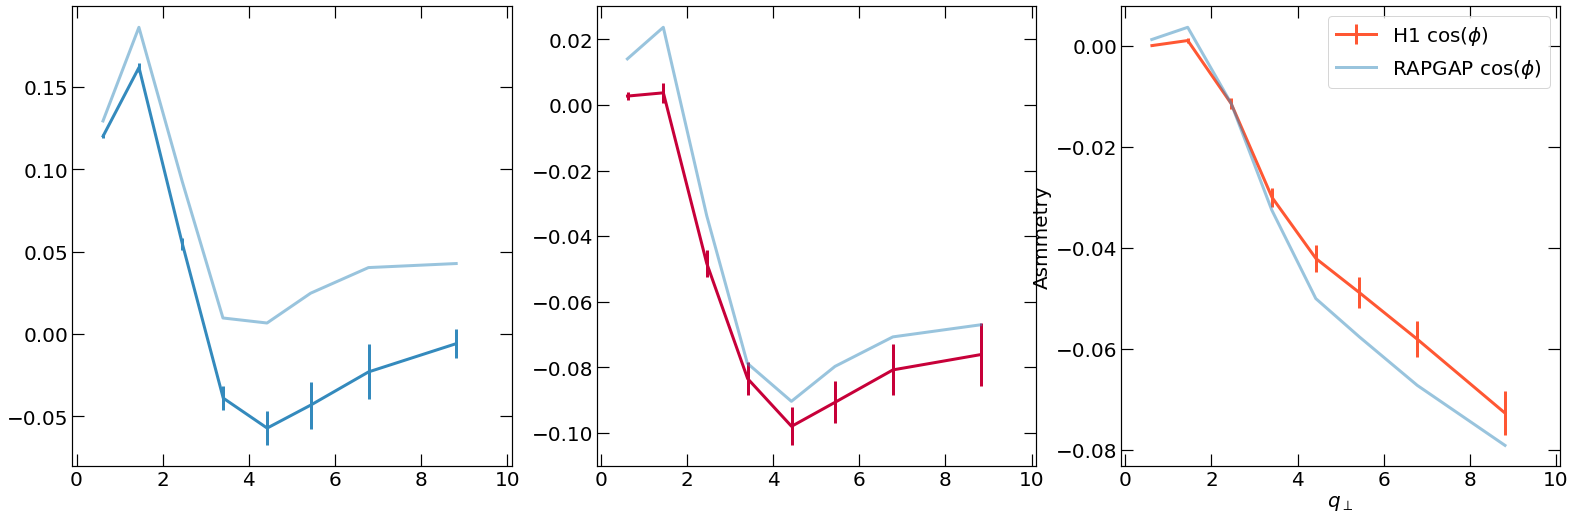

In [18]:
fig,axes = plt.subplots(1,3,figsize=(22,7))
#fig = plt.figure(figsize=(10,8))
#colors=["blue","purple","red"]
for i,key in enumerate(keys[1:]):
    axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],label="H1 $\cos(\phi)$",color=colors[i],linewidth=3)

for i,key in enumerate(keys[1:]):
    axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP $\cos(\phi)$",alpha=0.5,linewidth=3)
    #axes[i].set_ylim(-0.61,0.61)
    axes[i].set_xlim(-0.1,10.1)

plt.tight_layout()
plt.legend(fontsize=20)
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")

___

## Theory https://arxiv.org/pdf/2106.05307.pdf

In [19]:
theory = {}

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("theory_cos%iphi.npy"%(i))
    key = key+"_x"
    theory[key] = np.load("theory_cos%iphi_x.npy"%(i))

## Pythia [Roli+Kyle]

In [20]:
pythia = {}

for i in range(1,4):
    key = "cos%i"%(i)
    pythia[key] = np.genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,1]
    key = key+"_x"
    pythia[key] = np.genfromtxt('Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,0]
    
pythia_max_q_perp = 3.0
mask1 = pythia["cos1_x"] < pythia_max_q_perp
mask2 = pythia["cos2_x"] < pythia_max_q_perp
mask3 = pythia["cos3_x"] < pythia_max_q_perp

for i in range(1,4):
    key = "cos%i"%(i)+"_x"
    mask = pythia[key] < pythia_max_q_perp
    pythia[key] = pythia[key][mask]
    key = "cos%i"%(i)
    pythia[key] = pythia[key][mask]

___

## Overlay Everything

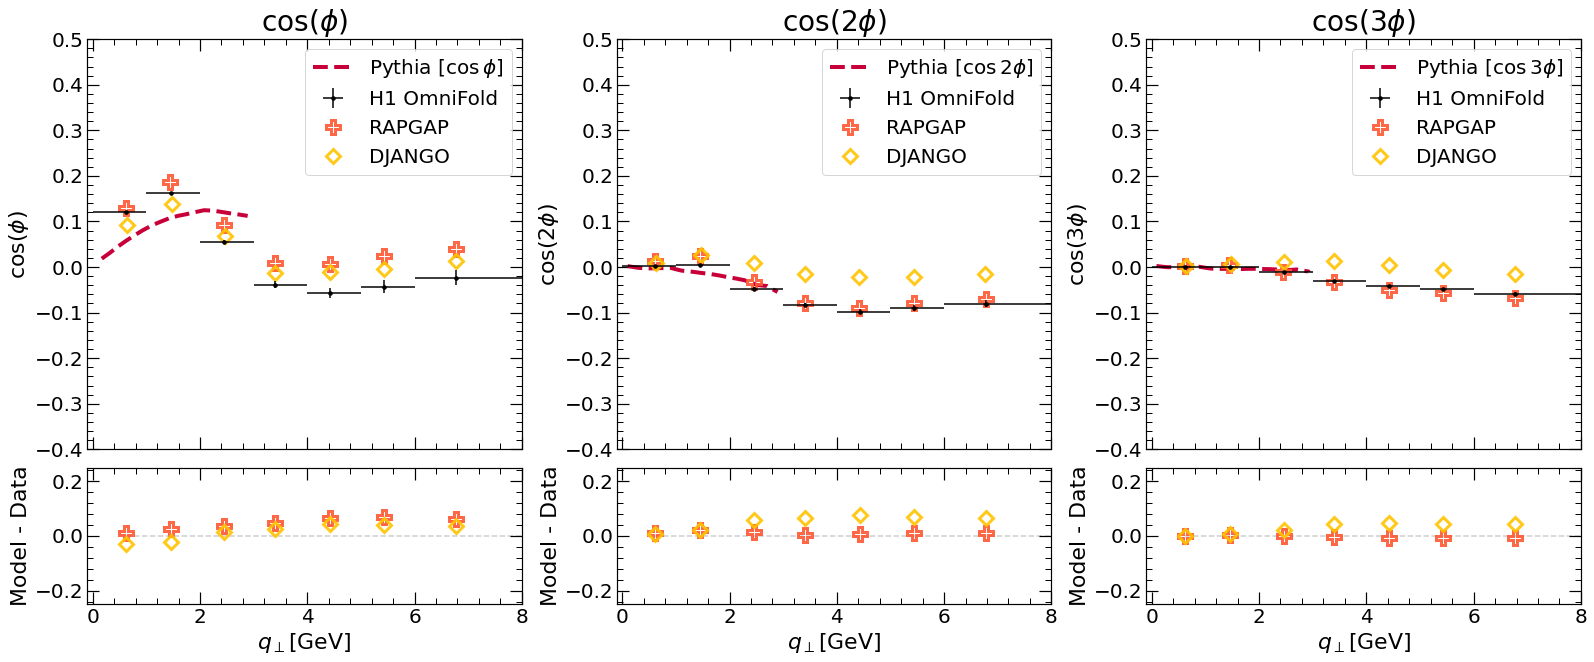

In [24]:
plot_h1rpgp = True #Default. Only one with bootstrap errors
plot_h1djgo = False

plot_rapgap = True
plot_django = True

plot_theory = False
plot_pythia = True

plot_modelSYS = False

plot_mask = np.asarray([plot_h1rpgp,plot_h1djgo,plot_rapgap,plot_django,plot_theory,plot_pythia, #data
                        plot_modelSYS])

#fig = plt.figure(figsize=(10,8))
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 9), constrained_layout=True,
                         gridspec_kw={'height_ratios': [3, 1]})
x_max = 8.0

#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), constrained_layout=True)
axes = np.ravel(axes)

#Omnifold H1 Data        
if (plot_h1rpgp):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color='black',zorder=20)
        
if (plot_h1djgo):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(h1_djgo["q_perp"],h1_djgo[key],xerr=x_errors,
                         label="H1 OmniFold [Django]",ls='none',ms=7,marker=".",color='grey')

if (plot_modelSYS):
    for i,key in enumerate(keys[1:]):
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-systematics['total'][key][xi],
                                 h1_rpgp[key][xi]+systematics['total'][key][xi], alpha=0.2,color='k',)
            #axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-model_sys[key][xi]*h1_rpgp[key][xi],
            #                     h1_rpgp[key][xi]+model_sys[key][xi]*h1_rpgp[key][xi], alpha=0.2,color='k',)
        
#H1 Simulation
if (plot_rapgap):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP",ls='none',marker="P",fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
        
if (plot_django):
    for i,key in enumerate(keys[1:]):
        axes[i].errorbar(django["q_perp"],django[key],label="DJANGO",ls='none',marker="D",fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])


if (plot_theory):
    axes[0].plot(theory['cos1_x'],theory['cos1'],label="SGR [$\cos\phi$]",linewidth=4,linestyle="solid",color=colors[5])
    axes[1].plot(theory['cos2_x'],theory['cos2'],label="SGR [$\cos2\phi$]",linewidth=4,linestyle="solid",color=colors[5])
    axes[2].plot(theory['cos3_x'],theory['cos3'],label="SGR [$\cos3\phi$]",linewidth=4,linestyle="solid",color=colors[5])
    
if (plot_pythia):
    axes[0].plot(pythia['cos1_x'],pythia['cos1'],label="Pythia [$\cos\phi$]",linewidth=4,linestyle="dashed",color=colors[1])
    axes[1].plot(pythia['cos2_x'],pythia['cos2'],label="Pythia [$\cos2\phi$]",linewidth=4,linestyle="dashed",color=colors[1])
    axes[2].plot(pythia['cos3_x'],pythia['cos3'],label="Pythia [$\cos3\phi$]",linewidth=4,linestyle="dashed",color=colors[1])


for i,key in enumerate(keys[1:]):
    axes[i+3].errorbar(h1_rpgp["q_perp"],h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
    #plt.fill_between
    #plt.fill_between(edges,-model_sys[key],model_sys[key], alpha=0.3,color='k',label='syst. error')
    if plot_modelSYS:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            #axes[i+3].fill_between(edges[xi],-model_sys[key][xi]*h1_rpgp[key][xi],model_sys[key][xi]*h1_rpgp[key][xi], alpha=0.2,color='k',)
            axes[i+3].fill_between(edges[xi],-stat_sys_error[key][xi],stat_sys_error[key][xi], alpha=0.2,color='k',)
    
    
    axes[i+3].errorbar(h1_rpgp["q_perp"],rapgap[key] - h1_rpgp[key],ls='none',marker="P",fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    
    axes[i+3].errorbar(h1_rpgp["q_perp"],django[key] - h1_rpgp[key],ls='none',marker="D",fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])

    #if (plot_pythia):
    #    pyth_key = "cos%i_x"%(i+1)
    #    axes[i+3].errorbar(pythia[pyth_key],pythia[key] - h1_rpgp[key],linewidth=4,linestyle="dashed",color=colors[4],alpha=0.9)

    axes[i+3].set_ylabel("Model - Data")
    axes[i+3].set_xlim(-0.1,x_max)
    axes[i+3].set_ylim(-0.25,0.25)
    axes[i+3].set_xlabel(r"$q_\perp$[GeV]")
    axes[i+3].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i+3].xaxis.set_minor_locator(AutoMinorLocator(5))

for i in range(3):
    string = r"$\cos(%i\phi)$"%(i+1)
    string = string.replace("1","")
        
    axes[i].legend()
    axes[i].set_title(string)
    axes[i].set_ylim(-0.4,0.5)
    axes[i].set_xlim(-0.1,x_max)
    axes[i].set_ylabel(string)
    axes[i].axes.set_xticklabels("")
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    if (plot_theory):
        axes[i].set_ylim(-0.6,0.6)


strings = np.asarray(["H1_Data","Unfolded_fromDjango","Rapgap","Django","Theory","Pythia","model_SYS"])
strings = strings[plot_mask]
string = ""
for i,datum in enumerate(strings):
    string += datum
    if i > 0: string +="+"
string = string[:-1]

plt.savefig(string+".pdf")

### 2D Asymmetry Histograms

In [22]:
N_Bins = 50
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5), constrained_layout=True)


h0, xedges0, yedges0 = np.histogram2d(q_perp, (asymm_phi), bins=(np.linspace(0,10,N_Bins),np.linspace(0,3,N_Bins)), weights=weights)
h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm0 = axes[0].pcolormesh(xedges0, yedges0, h0.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm1 = axes[1].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm2 = axes[2].pcolormesh(xedges2, yedges2, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm3 = axes[3].pcolormesh(xedges3, yedges3, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[0].set_ylabel("$\phi$",fontsize=22)
axes[1].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[3].set_ylabel("$\cos(3\phi)$",fontsize=22)
#cb0=axes[0].colorbar(pcm,ax)

fig.colorbar(pcm0, ax=axes[0], pad= -0.049)
fig.colorbar(pcm1, ax=axes[1], pad= -0.01)
fig.colorbar(pcm2, ax=axes[2], pad= -0.01)
cb=fig.colorbar(pcm3, ax=axes[3], pad= -0.01)

plt.xlabel("$q_\perp$",fontsize=22)
cb.set_label("Counts",fontsize=22)
plt.savefig("2D_asymmetries.png")

NameError: name 'copy' is not defined

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 9), constrained_layout=True)
x_max = 8.0

#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 7), constrained_layout=True)
axes = np.ravel(axes)

axes[0].errorbar(h1_rpgp["q_perp"],h1_rpgp["phi"],yerr=btstrp_errors*h1_rpgp[key],xerr=x_errors,
                         label="H1 OmniFold",ls='none',ms=7,marker=".", color='black')

i=0
axes[i].legend()
axes[i].set_title("H1 OmniFold Lepton-Jet Asymmetry")
axes[i].set_xlim(-0.1,x_max)
axes[i].set_ylim(60,165)
axes[i].set_xlabel("$q_\perp$")
axes[i].set_ylabel("$\phi$",fontsize=30)
axes[i].axes.set_xticklabels("")
axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.savefig("phi.pdf")

### MOVE TO SEPARATE NB: COVARIANCE MATRIX

In [ ]:
np.cov(h1_rpgp["q_perp"],h1_rpgp["q_perp"])

In [ ]:
print(np.shape(h1_rpgp["q_perp"]))

In [ ]:
mat = np.stack((h1_rpgp["q_perp"],h1_rpgp["q_perp"]))
cov_mat = np.cov(mat)

In [ ]:
print(cov_mat)

In [ ]:
    cov_mat = np.zeros([len(h1_rpgp["q_perp"]),len(h1_rpgp["q_perp"])])
    for i in range(len(q_perp_bins)-1):
            for j in range(len(q_perp_bins)-1):
                #Stat. uncert
                EX = np.mean(np.array([rapgap_q_perp["q_perp"][ii] for ii in range(1,100)])[:,i])
                EY = np.mean(np.array([h1_rpgp["q_perp"][ii] for ii in range(1,100)])[:,j])
                EXY = np.mean(np.array(np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,i]*np.array([unfolded_vals[ii,jj] for ii in range(1,100)])[:,j]))
                cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)
    cor_mat = cov_mat.copy()
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 